# R script

***
###   

In [2]:
library(ggplot2)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


In [1]:
# Load AUROC file
RNALight <- read.csv('./RNA-Light_lncRNA/Evaluation_Result/AUROC_info.txt',sep = '\t')
iLoc_LncRNA <- read.csv('./iLoc-LncRNA/Evaluation_Result/AUROC_info.txt',sep = '\t')
lncLocator <- read.csv('./lncLocator/Evaluation_Result/AUROC_info.txt',sep = '\t')
# Group
RNALight$group <- "RNAlight"
iLoc_LncRNA$group <- "iLoc_LncRNA"
lncLocator$group <- "lncLocator"


AUROC_df <- rbind(RNALight,iLoc_LncRNA,lncLocator)
AUROC_df$group<- factor(AUROC_df $group,
                levels = c("RNAlight",  "iLoc_LncRNA","lncLocator"))

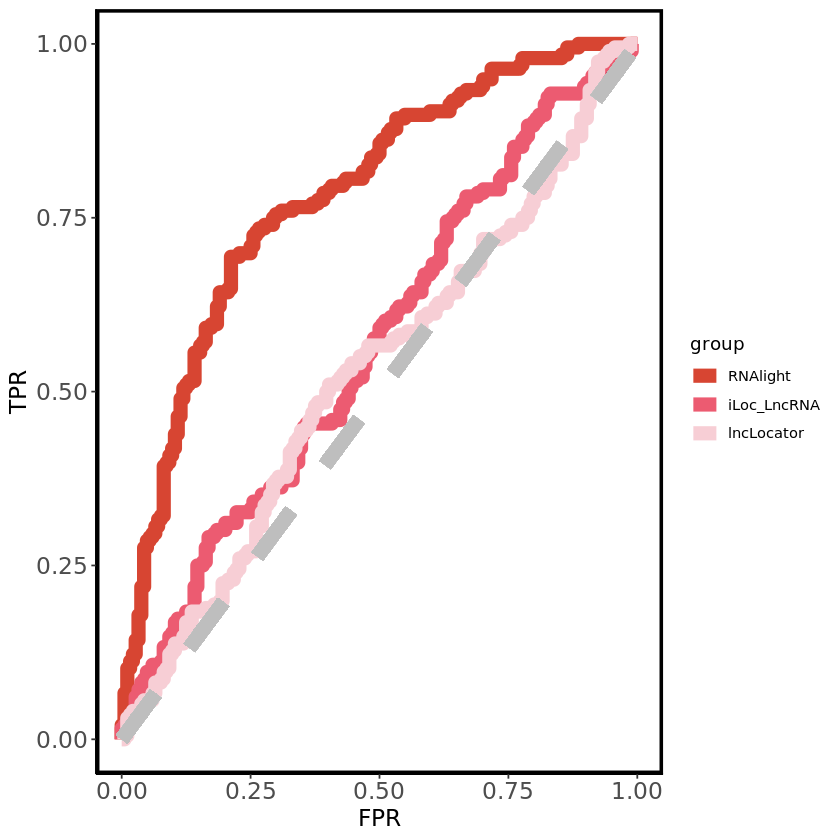

In [9]:
# Plot
p_auc <- ggplot(data=AUROC_df ,aes(x=FPR,y=TPR))+
geom_line(aes(color=group),size = 4)+
geom_segment(x=0,xend=1,y=0,yend=1,colour ="gray",linetype = "dashed",size = 4)+
theme_classic()+
theme(panel.border = element_rect(colour = "black", fill=NA,size = 2),
      axis.text = element_text(size=14),
      axis.title = element_text(size=14))+
scale_color_manual(values = c("#D74532","#EC5B71","#F7CED5"))
ggsave("./03_RNA-Light_Test-lncRNA_AUC_with_text.pdf", p_auc, width = 10, height = 10) 
p_auc

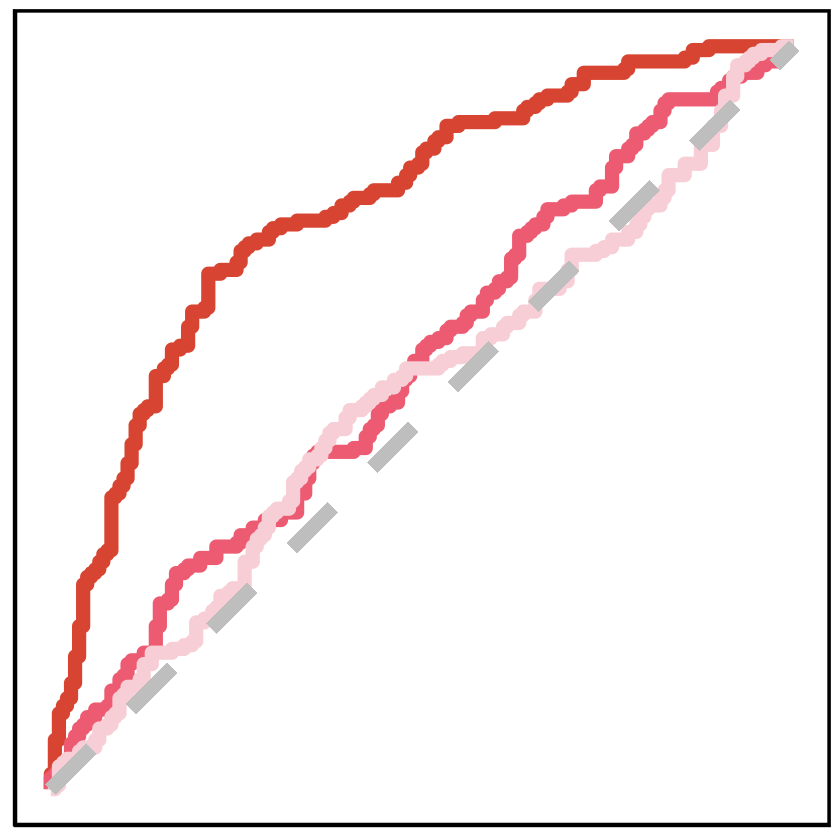

In [11]:
p_auc<- p_auc + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./03_RNA-Light_Test-lncRNA_AUC.pdf", p_auc, width = 10, height = 10) 
p_auc